In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/vedikaS-byte/eds220-hwk2

- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

<Axes: title={'center': 'Average Salmon Catch By Region (1878-1997)'}, xlabel='Region', ylabel='Average Salmon Catch'>

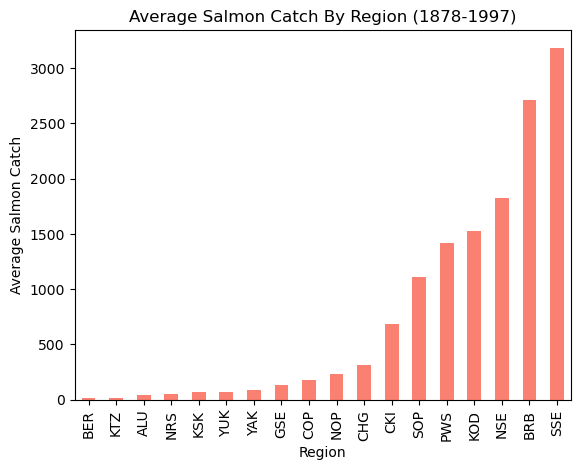

In [3]:
# FINAL CODE

# Define abbreviation for pandas package
import pandas as pd

# Import data from folder
catch_data = pd.read_csv("data/salmon_data.csv")

# Locate the 400th row of the 3rd column (catch) to replace the value at this index with 1 using at()
catch_data.at[400, "Catch"] = 1

# Convert the "Catch" column to an int64 type
catch_data["Catch"] = pd.to_numeric(catch_data["Catch"])

# Use group_by() to group catch by region, then call mean() to find average catch per region
avg_region = catch_data.groupby("Region").Catch.mean().sort_values() # Sort average catches per region in ascending order
avg_region = pd.DataFrame(avg_region) # Convert group_by() object to data frame

# Create a bar graph of salmon catchs in ascending order
avg_region.plot.bar( 
    y = "Catch", # Average catches
    legend = False, # No legend necessary
    color = "salmon", # Choose appropriate color
    ylabel = "Average Salmon Catch", 
    title = "Average Salmon Catch By Region (1878-1997)"
)

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [ ]:
# a.
# Define abbreviation for pandas package
import pandas as pd

# Import data from folder
catch_data = pd.read_csv("data/salmon_data.csv")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [ ]:
# b.
# Check out the type of object as well as how many non-null values in each 
catch_data.info()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [ ]:
# Call unique() on dataset for notesRegCode column 
notes_unique = catch_data.notesRegCode.unique()
print(notes_unique)

In [ ]:
grader.check("q2a")

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [ ]:
# Use .drop() to specify the column to drop
catch_data = catch_data.drop(columns = ["notesRegCode"])
# Double check notesRegCode was dropped successfully by calling names of columns in Data Frame
catch_data.columns

In [ ]:
grader.check("q2b")

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


_Type your answer here, replacing this text._

We would expect ```Catch``` to be a numeric int64 type rather than stored as an ```object``` string type. Here, it is observed that ```Catch``` is stored as an ```object``` type despite storing integers.

In [ ]:
# Check the data type of each column in the data frame
catch_data.dtypes

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [ ]:
catch_data['Catch'].astype('int64')

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. It should contain the original index number in order to pass the test. 

In [ ]:
# Use .loc to pass the conditional of each observation equating to "I" and return the indexed row
catch_I = catch_data.loc[catch_data["Catch"] == "I",]
catch_I 

In [ ]:
grader.check("q5")

## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

<!-- BEGIN QUESTION -->



In [ ]:
# Locate the 400th row of the 3rd column (catch) to replace the value at this index with 1 using at()
catch_data.at[400, "Catch"] = 1

# Store the 400th row of catch_data in catch_1
catch_1 = catch_data.iloc[400,]

# Print catch_1
catch_1

<!-- END QUESTION -->

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [ ]:
# Convert the "Catch" column to an int64 type
catch_data["Catch"] = pd.to_numeric(catch_data["Catch"])

# Double check that Catch is an int64 numeric type
catch_column_type = catch_data.Catch.dtypes
catch_column_type

In [ ]:
grader.check("q7")

<!-- BEGIN QUESTION -->

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [ ]:
# Use group_by() to group catch by region, then call mean() to find average catch per region
avg_region = catch_data.groupby("Region").Catch.mean().sort_values()
#avg_region = avg_region.reset_index()
avg_region = pd.DataFrame(avg_region)
avg_region

In [ ]:
grader.check("q8")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<Axes: title={'center': 'Average Salmon Catch By Region (1878-1997)'}, xlabel='Region', ylabel='Average Salmon Catch'>

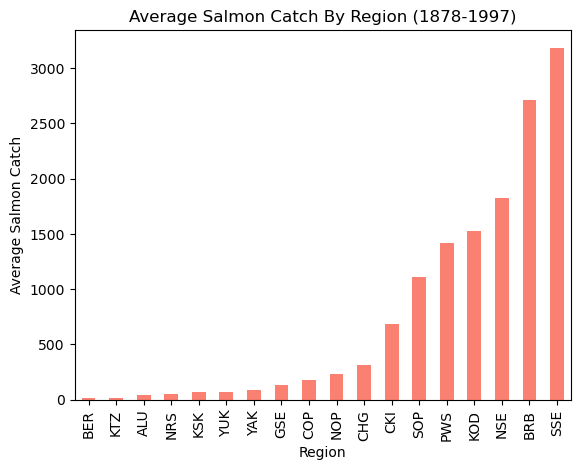

In [4]:
# Create a bar graph of salmon catchs in ascending order
avg_region.plot.bar( 
    y = "Catch", # Average catches
    legend = False, # No legend necessary
    color = "salmon", # Choose appropriate color
    ylabel = "Average Salmon Catch", 
    title = "Average Salmon Catch By Region (1878-1997)"
)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

<!-- END QUESTION -->

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()